## Deep learning -- CNN

In [1]:
!pip3 install keras

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant

Using TensorFlow backend.
/Users/Bourne/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32') 
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


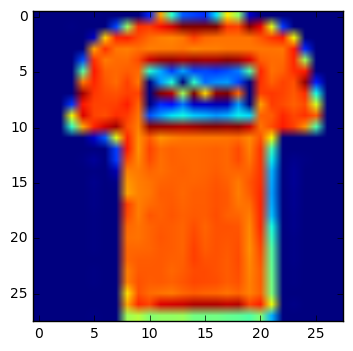

In [5]:
plt.imshow(x_train[1, :].reshape((28, 28)))
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(64, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

In [11]:
history = model.fit(x_train, y_train,
          batch_size=50,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2387 - acc: 0.9113 - val_loss: 0.2358 - val_acc: 0.9135
Epoch 2/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2325 - acc: 0.9124 - val_loss: 0.2480 - val_acc: 0.9093
Epoch 3/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2312 - acc: 0.9146 - val_loss: 0.2389 - val_acc: 0.9127
Epoch 4/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2223 - acc: 0.9164 - val_loss: 0.2354 - val_acc: 0.9127
Epoch 5/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2202 - acc: 0.9182 - val_loss: 0.2403 - val_acc: 0.9139
Epoch 6/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2152 - acc: 0.9186 - val_loss: 0.2439 - val_acc: 0.9079
Epoch 7/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2127 - acc: 0.9199 - val_loss: 0.2410 - val_acc

In [12]:
print("loss: ", score[0])
print("accuracy: ",score[1])

loss:  0.23691862152814866
accuracy:  0.9153


dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])


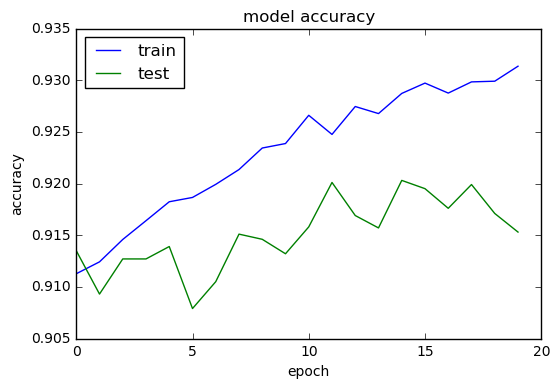

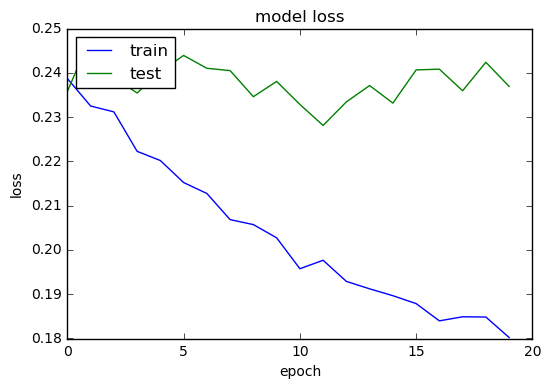

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

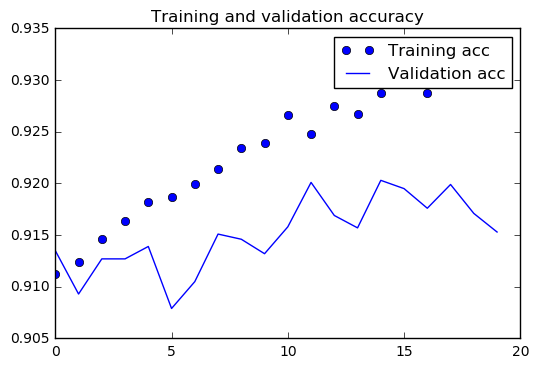

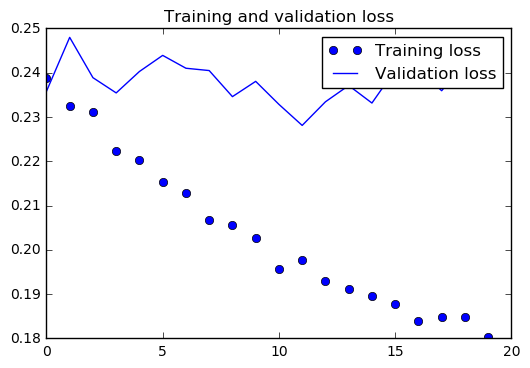

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()